In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [104]:
data = pd.read_csv('cereal.csv')

In [105]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [107]:
data.shape

(77, 16)

In [108]:
data.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


In [109]:
df = data.copy()

In [110]:
data.drop(['name'], axis=1, inplace=True)

In [111]:
m_cols = [col for col in data.columns if data[col].dtype in ['int64','float64']]
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [112]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [113]:
print(df.duplicated().sum())

0


In [114]:
numerical_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']
numerical_stats = df[numerical_columns].describe()
print("Summary Statistics of Numerical Features:\n", numerical_stats)

Summary Statistics of Numerical Features:
          calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins     weight       cups  
count  77.000000   77.000000   77.000000  77.000000  77.000000  
mean    6.922078   96.077922   28.246753   1.029610   0.821039  
std     4.444885   71.286813   22.342523   0.150477   0.232716  
min

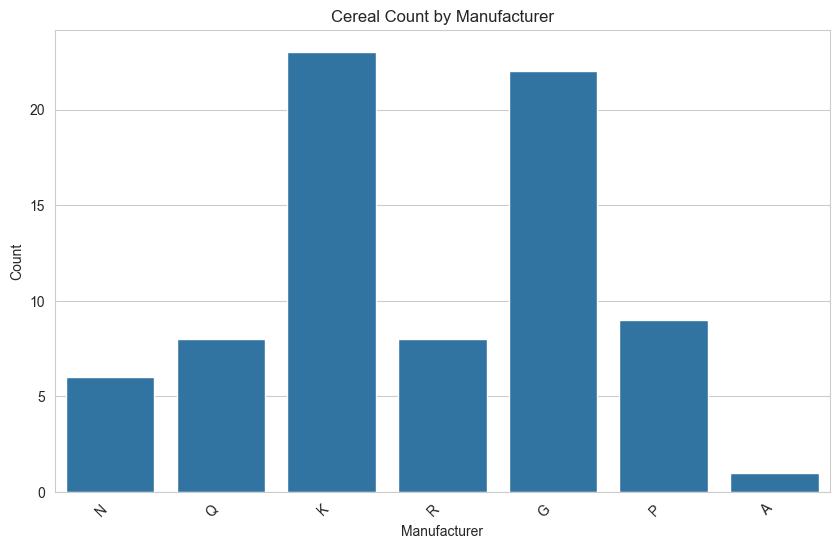

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Cereal Count by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.show()

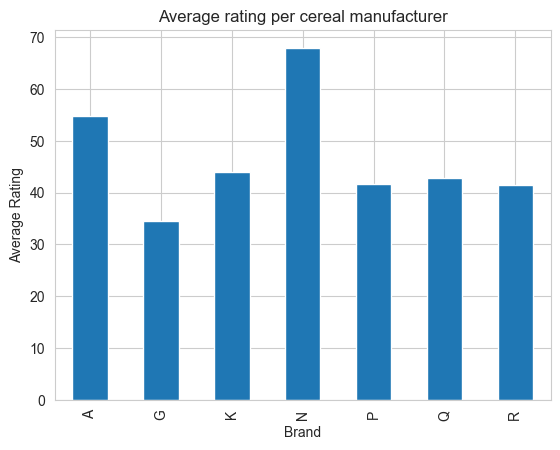

In [116]:
numeric_cols = data.select_dtypes(include='number').columns
grouped_df = data.groupby("mfr")[numeric_cols].mean()
ratings = grouped_df["rating"]
ratings.plot(kind="bar")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.title("Average rating per cereal manufacturer")
plt.show()

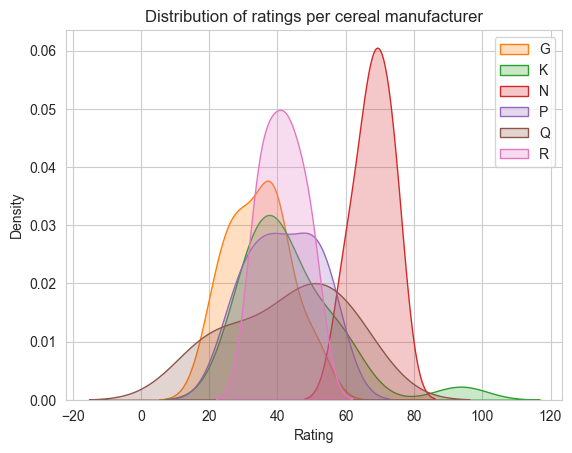

In [117]:
sns.set_style("whitegrid")
for brand, brand_df in data.groupby("mfr"):
    sns.kdeplot(brand_df["rating"], label=brand, fill=True)

plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Distribution of ratings per cereal manufacturer")
plt.legend()
plt.show()

In [118]:
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [119]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<Axes: >

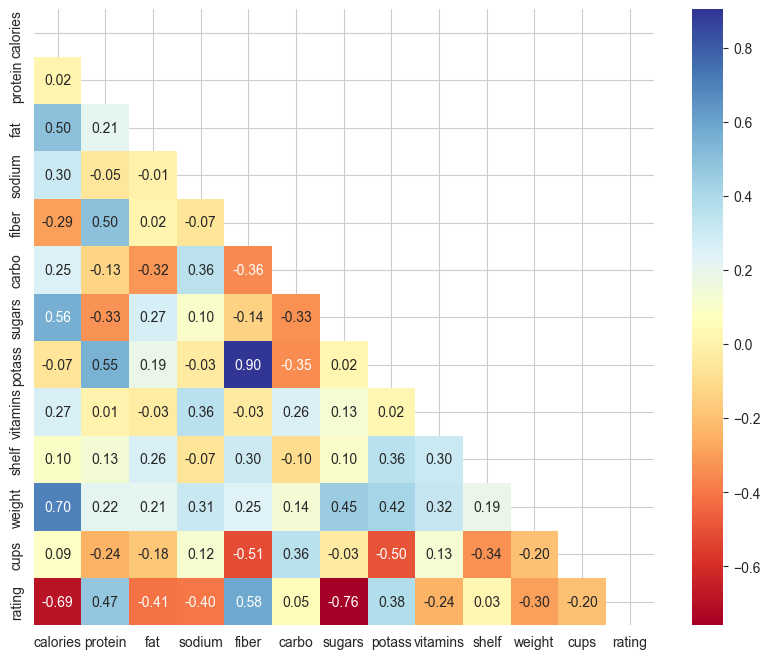

In [120]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap="RdYlBu", annot=True, fmt=".02f")

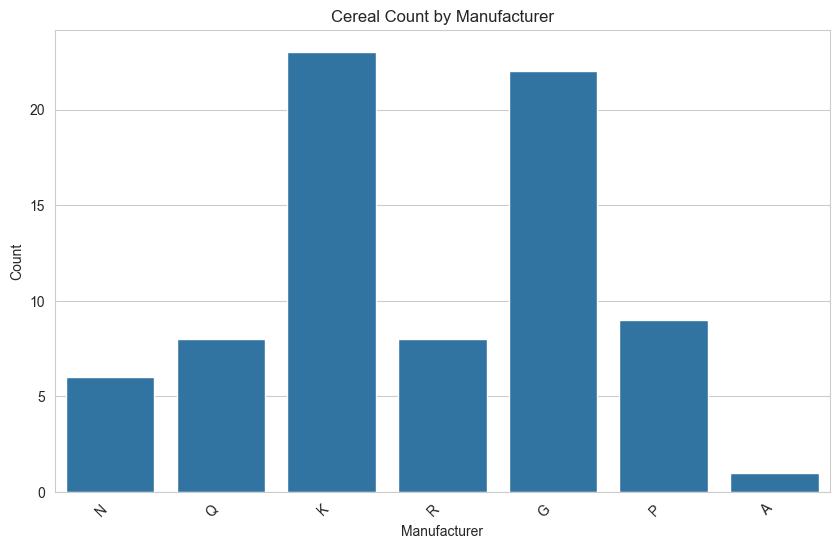

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Cereal Count by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.show()

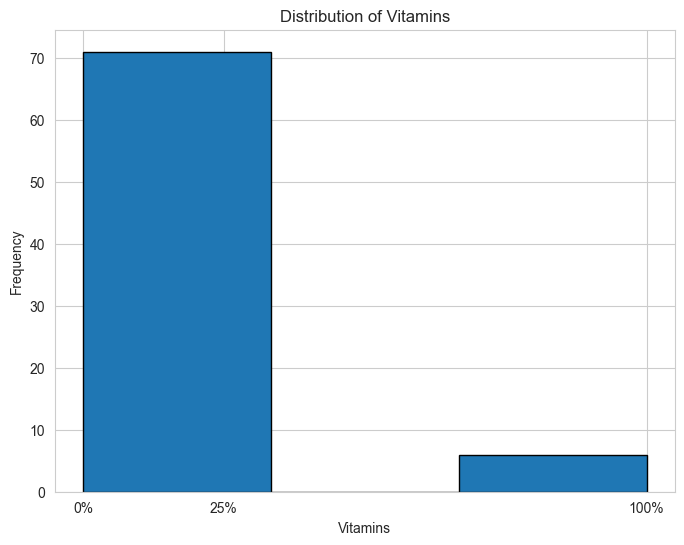

In [122]:
plt.figure(figsize=(8, 6))
plt.hist(df['vitamins'], bins=3, edgecolor='black')
plt.xlabel('Vitamins')
plt.ylabel('Frequency')
plt.title('Distribution of Vitamins')
plt.xticks([0, 25, 100], ['0%', '25%', '100%'])
plt.show()

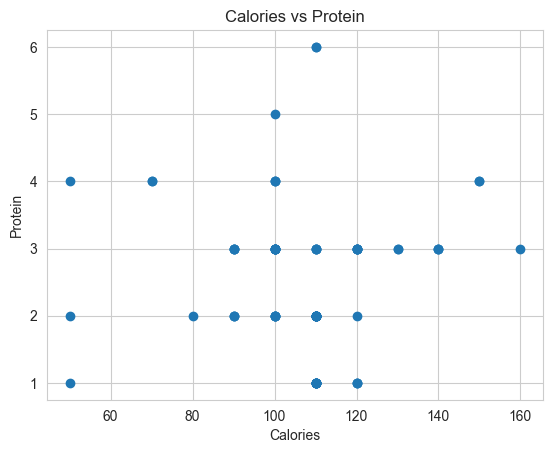

In [123]:
plt.scatter(df['calories'], df['protein'])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs Protein')
plt.show()

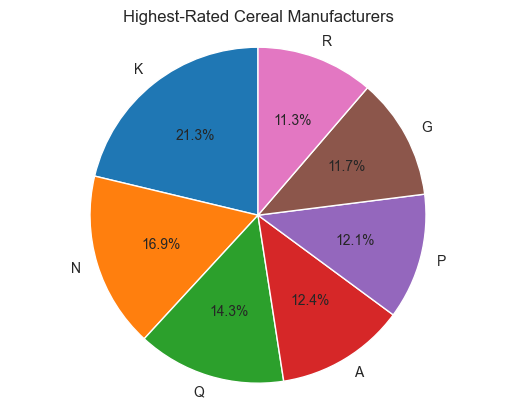

In [124]:
import matplotlib.pyplot as plt
highest_rating = df.groupby('mfr')['rating'].max().reset_index()
highest_rating = highest_rating.sort_values('rating', ascending=False)
manufacturers = highest_rating['mfr'].tolist()
ratings = highest_rating['rating'].tolist()
plt.pie(ratings, labels=manufacturers, autopct='%1.1f%%', startangle=90)
plt.title('Highest-Rated Cereal Manufacturers')
plt.axis('equal')
plt.show()